In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv("filtered_app_incident_updated.csv")

In [3]:
dataset

,app_name,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
0,NIP,22,61,32,42,52,12000,1,1
1,NIP,18,89,28,38,48,8000,1,1
2,NIP,14,61,24,34,44,4000,1,1
3,NIP,10,90,20,30,40,0,1,1
4,NIP,14,87,24,34,44,4000,1,1
...,...,...,...,...,...,...,...,...,...
1543,NIP,20,28,30,40,50,10000,0,0
1544,NIP,21,50,31,41,51,11000,0,0
1545,NIP,22,33,32,42,52,12000,0,0
1546,NIP,21,11,31,41,51,11000,0,0


## Finding null values and replacing them

In [4]:
dataset.isnull().sum()

app_name             0
response_time        0
error_rate           0
cpu_usage            0
memory_usage         0
disk_space           0
active_users         0
incident_duration    0
downtime             0
dtype: int64

## Finding the information about the dataset (dtype) object or integer that column contains

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   app_name           1548 non-null   object
 1   response_time      1548 non-null   int64 
 2   error_rate         1548 non-null   int64 
 3   cpu_usage          1548 non-null   int64 
 4   memory_usage       1548 non-null   int64 
 5   disk_space         1548 non-null   int64 
 6   active_users       1548 non-null   int64 
 7   incident_duration  1548 non-null   int64 
 8   downtime           1548 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 109.0+ KB


## Dataset shape for downtime and incident_duration

In [6]:
dataset['downtime'].value_counts()

downtime
0    1000
1     548
Name: count, dtype: int64

In [7]:
dataset['incident_duration'].value_counts()

incident_duration
0    1000
1     548
Name: count, dtype: int64

## Downsampling the dataset to balance the dataset

In [8]:
from sklearn.utils import resample
import pandas as pd

# Load the dataset
data = pd.read_csv('filtered_app_incident_updated.csv')  # Replace with your file path

# Separate the dataset into two groups based on the 'downtime' column
majority_class = data[data['downtime'] == 0]
minority_class = data[data['downtime'] == 1]

# Downsample the majority class to match the size of the minority class
majority_downsampled = resample(majority_class, 
                                replace=False,  # sample without replacement
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)  # for reproducibility

# Combine the downsampled majority class with the minority class
balanced_data = pd.concat([majority_downsampled, minority_class])

# Shuffle the resulting dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataset
balanced_data.to_csv('balanced_dataset.csv', index=False)  # Replace with your desired file path

## After downsampling checking for shape of dataset

In [9]:
balanced_data['downtime'].value_counts()

downtime
0    548
1    548
Name: count, dtype: int64

## seperating the quan and qual

In [10]:
def quanQual(balanced_data):
    quan=[]
    qual=[]
    for columnName in balanced_data.columns:
        print(columnName)
        if(balanced_data[columnName].dtype=='object'):
            print("qual")
            qual.append(columnName)
        else:
            print("quan")
            quan.append(columnName)
    return quan,qual

In [11]:
quan,qual=quanQual(balanced_data)

app_name
qual
response_time
quan
error_rate
quan
cpu_usage
quan
memory_usage
quan
disk_space
quan
active_users
quan
incident_duration
quan
downtime
quan


In [12]:
quan

['response_time',
 'error_rate',
 'cpu_usage',
 'memory_usage',
 'disk_space',
 'active_users',
 'incident_duration',
 'downtime']

In [13]:
qual

['app_name']

## Basic information of dataset by Dataframe to view

In [14]:
balanced_data.describe()

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,16.076642,51.979015,26.076642,36.076642,46.076642,6076.642336,0.500000,0.500000
std,3.676106,28.945272,3.676106,3.676106,3.676106,3676.105996,0.500228,0.500228
min,10.000000,1.000000,20.000000,30.000000,40.000000,0.000000,0.000000,0.000000
25%,14.000000,27.000000,24.000000,34.000000,44.000000,4000.000000,0.000000,0.000000
50%,16.000000,53.000000,26.000000,36.000000,46.000000,6000.000000,0.500000,0.500000
75%,18.000000,77.250000,28.000000,38.000000,48.000000,8000.000000,1.000000,1.000000
max,22.000000,100.000000,32.000000,42.000000,52.000000,12000.000000,1.000000,1.000000


## Measure of central tendency, quartile, 1.5 rule, minimum, maximum

In [15]:
descriptive = pd.DataFrame(index=["mean", "median", "mode", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%",
                                  "IQR", "1.5rule", "Lesser", "Greater", "Min", "Max"], columns=quan)

for columnName in quan:
    descriptive.loc["mean", columnName] = balanced_data[columnName].mean()
    descriptive.loc["median", columnName] = balanced_data[columnName].median()
    descriptive.loc["mode", columnName] = balanced_data[columnName].mode()[0]
    descriptive.loc["Q1:25%", columnName] = balanced_data.describe()[columnName]["25%"]
    descriptive.loc["Q2:50%", columnName] = balanced_data.describe()[columnName]["50%"]
    descriptive.loc["Q3:75%", columnName] = balanced_data.describe()[columnName]["75%"]
    descriptive.loc["Q4:100%", columnName] = balanced_data.describe()[columnName]["max"]
    descriptive.loc["IQR", columnName] = descriptive.loc["Q3:75%", columnName] - descriptive.loc["Q1:25%", columnName]
    descriptive.loc["1.5rule", columnName] = 1.5 * descriptive.loc["IQR", columnName]
    descriptive.loc["Lesser", columnName] = descriptive.loc["Q1:25%", columnName] - descriptive.loc["1.5rule", columnName]
    descriptive.loc["Greater", columnName] = descriptive.loc["Q3:75%", columnName] + descriptive.loc["1.5rule", columnName]
    descriptive.loc["Min", columnName] = balanced_data[columnName].min()
    descriptive.loc["Max", columnName] = balanced_data[columnName].max()


In [16]:
descriptive

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
mean,16.076642,51.979015,26.076642,36.076642,46.076642,6076.642336,0.5,0.5
median,16.0,53.0,26.0,36.0,46.0,6000.0,0.5,0.5
mode,18,53,28,38,48,8000,0,0
Q1:25%,14.0,27.0,24.0,34.0,44.0,4000.0,0.0,0.0
Q2:50%,16.0,53.0,26.0,36.0,46.0,6000.0,0.5,0.5
Q3:75%,18.0,77.25,28.0,38.0,48.0,8000.0,1.0,1.0
Q4:100%,22.0,100.0,32.0,42.0,52.0,12000.0,1.0,1.0
IQR,4.0,50.25,4.0,4.0,4.0,4000.0,1.0,1.0
1.5rule,6.0,75.375,6.0,6.0,6.0,6000.0,1.5,1.5
Lesser,8.0,-48.375,18.0,28.0,38.0,-2000.0,-1.5,-1.5


## Finding outliers

In [17]:
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [18]:
print("Lesser:", lesser)
print("Greater:", greater)

Lesser: []
Greater: []


## If any outliers are formed to replacing the outliers

In [19]:
for columnName in lesser:
    dataset[columnName][balanced_data[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
for columnName in greater:
    dataset[columnName][balanced_data[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]


In [20]:
lesser

[]

In [21]:
greater

[]

## FREQUENCY

In [22]:
freqTable=pd.DataFrame(columns=["unique_values","Frequency","Relative_frequency","Cumsum"])
freqTable

,unique_values,Frequency,Relative_frequency,Cumsum


In [23]:
def freqTable(columnName,balanced_data):
    freqTable=pd.DataFrame(columns=["unique_values","Frequency","Relative_frequency","Cumsum"])
    freqTable["unique_values"]=balanced_data[columnName].value_counts().index
    freqTable["Frequency"]=balanced_data[columnName].value_counts().values
    freqTable["Relative_frequency"]=(freqTable["Frequency"]/103)
    freqTable["Cumsum"]=freqTable["Relative_frequency"].cumsum()
    return freqTable

In [24]:
freqTable("active_users",balanced_data)

,unique_values,Frequency,Relative_frequency,Cumsum
0,8000,225,2.184466,2.184466
1,4000,222,2.155340,4.339806
2,12000,113,1.097087,5.436893
3,0,111,1.077670,6.514563
4,11000,52,0.504854,7.019417
5,9000,50,0.485437,7.504854
6,10000,50,0.485437,7.990291
7,6000,49,0.475728,8.466019
8,7000,48,0.466019,8.932039
9,1000,47,0.456311,9.388350


## skewness, kurtosis, variance and standard deviation

In [25]:
def Univariate(dataset, quan):
    descriptive = pd.DataFrame(index=["mean", "median", "mode", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%",
                                      "IQR", "1.5rule", "Lesser", "Greater", "Min", "Max", "skew", 
                                      "kurtosis", "var", "Std"], columns=quan)
    for columnName in quan:
        descriptive.loc["mean", columnName] = dataset[columnName].mean()
        descriptive.loc["median", columnName] = dataset[columnName].median()
        descriptive.loc["mode", columnName] = dataset[columnName].mode()[0]
        descriptive.loc["Q1:25%", columnName] = dataset.describe()[columnName]["25%"]
        descriptive.loc["Q2:50%", columnName] = dataset.describe()[columnName]["50%"]
        descriptive.loc["Q3:75%", columnName] = dataset.describe()[columnName]["75%"]
        descriptive.loc["Q4:100%", columnName] = dataset.describe()[columnName]["max"]
        descriptive.loc["IQR", columnName] = descriptive.loc["Q3:75%", columnName] - descriptive.loc["Q1:25%", columnName]
        descriptive.loc["1.5rule", columnName] = 1.5 * descriptive.loc["IQR", columnName]
        descriptive.loc["Lesser", columnName] = descriptive.loc["Q1:25%", columnName] - descriptive.loc["1.5rule", columnName]
        descriptive.loc["Greater", columnName] = descriptive.loc["Q3:75%", columnName] + descriptive.loc["1.5rule", columnName]
        descriptive.loc["Min", columnName] = dataset[columnName].min()
        descriptive.loc["Max", columnName] = dataset[columnName].max()
        descriptive.loc["skew", columnName] = dataset[columnName].skew()
        descriptive.loc["kurtosis", columnName] = dataset[columnName].kurtosis()
        descriptive.loc["var", columnName] = dataset[columnName].var()
        descriptive.loc["Std", columnName] = dataset[columnName].std()
    
    return descriptive


In [26]:
Univariate(dataset,quan)

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
mean,16.01615,52.082687,26.01615,36.01615,46.01615,6016.149871,0.354005,0.354005
median,16.0,52.0,26.0,36.0,46.0,6000.0,0.0,0.0
mode,18,11,28,38,48,8000,0,0
Q1:25%,14.0,27.0,24.0,34.0,44.0,4000.0,0.0,0.0
Q2:50%,16.0,52.0,26.0,36.0,46.0,6000.0,0.0,0.0
Q3:75%,18.25,78.0,28.25,38.25,48.25,8250.0,1.0,1.0
Q4:100%,22.0,100.0,32.0,42.0,52.0,12000.0,1.0,1.0
IQR,4.25,51.0,4.25,4.25,4.25,4250.0,1.0,1.0
1.5rule,6.375,76.5,6.375,6.375,6.375,6375.0,1.5,1.5
Lesser,7.625,-49.5,17.625,27.625,37.625,-2375.0,-1.5,-1.5


## To view the density of active_users

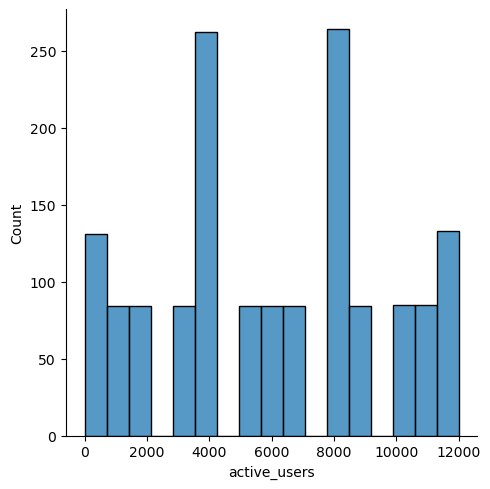

In [27]:
sns.displot(dataset["active_users"])

## probability of desired range(mean and standard deviation)

In [28]:
def get_pdf_probability(balanced_data, startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    
    # Plot histogram with KDE
    ax = sns.histplot(balanced_data, kde=True, line_kws={'color': 'blue'}, color='Green')
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    
    # Generate a sample
    sample = balanced_data
    # Calculate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    
    # Define the distribution
    dist = norm(sample_mean, sample_std)
    # Sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob = sum(probabilities)
    print("The area between range({}, {}): {}".format(startrange, endrange, prob))
    return prob


Mean=6076.642, Standard Deviation=3676.106
The area between range(7500, 10000): 0.2063993746303273


0.2063993746303273

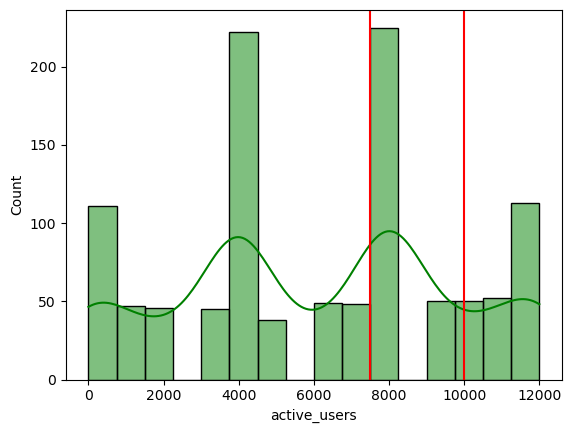

In [29]:
get_pdf_probability(balanced_data["active_users"],7500,10000)